- 仿真代价函数：$f_i(x_i,\sigma(x))=\frac{1}{2}\|x_i - p_i\|^2 + \frac{1}{2}\|x_i - b\|^2 + \frac{5}{N}\|\sigma(x) - b\|^2$

- 聚合函数：$\sigma(x) = \phi_1(x_1) + \phi_2(x_2) + ... + \phi_n(x_n)$

- 花费函数：$\phi_i(x_i) = \frac{x_i}{n}$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Iter_Num = 1000
n = 5
x = np.zeros(n)
r = np.zeros(n)
alpha = 0.01
beta = 0.01
v = []
for i in range(n):
    t = []
    for j in range(n):
        if j == i: t.append(1.0)
        else: t.append(0.0)
    v.append(t)
v = np.array(v)
s = x.copy()
y = np.zeros(n)
a = [
    [1/2, 0, 1/2, 0, 0],
    [1/3, 1/3, 0, 0, 1/3],
    [0, 1/2, 1/2, 0, 0],
    [0, 1/2, 0, 1/2, 0],
    [0, 0, 0, 1/2, 1/2]
]
a = np.array(a)
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)] # 存每个点迭代过程中关于x坐标的sigma_i  s_x[i][tim]
s_y = [[] for i in range(n)] # 存每个点迭代过程中关于y坐标的sigma_i  s_y[i][tim]
r1 = [1.0, 4.0, 9.0, 4.0, 8.0] # x坐标
r2 = [6.0, 8.0, 8.0, 2.0, 3.0] # y坐标
r1 = np.array(r1)
r2 = np.array(r2)

xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = s.copy()

#-------------------------------------------------------------------

def get_sigma():
    sum = 0
    for i in range(n):
        sum += x[i]
    sum /= n
    return sum

def upd_x(i, op):
    if op == 1:
        xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + (1 / n) * (y[i] + 2 * (s[i] - 5) / n / v[i, i]))
    else:
        xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 7) + (1 / n) * (y[i] + 2 * (s[i] - 7) / n / v[i, i]))
    # 下面为使用全局信息的算法
    # sum = 0
    # for j in range(n):
    #     sum += 2 * (get_sigma() - 5) / n
    # xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + sum)

def upd_v(i):
    sum = np.zeros(n)
    for j in range(n):
        sum += a[i, j] * v[j]
    vv[i] = sum.copy()

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += a[i, j] * s[j]
    ss[i] = sum + (xx[i] / n) / vv[i, i] - (x[i] / n) / v[i, i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += a[i, j] * ss[j]
    yy[i] = y[i] + beta * (ss[i] - sum)

def backup():
    global x, v, s, y
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()

def init(op):
    global x, r, v, s, y
    global xx, vv, ss, yy
    x = np.random.randint(3, 8, n) # x是(1, 5)的随机数
    x = np.float64(x)
    print(x)
    r = np.zeros(n)
    v = []
    for i in range(n):
        t = []
        for j in range(n):
            if j == i: t.append(1.0)
            else: t.append(0.0)
        v.append(t)
    v = np.array(v)
    s = x.copy()
    for i in range(n):
        s[i] = s[i] / n
    y = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()

def cal(iter_num):
    sum = 0
    for i in range(n):
        sum += 0.5 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               0.5 * ((ans_x[i][iter_num-1] - 5) ** 2 + (ans_y[i][iter_num-1] - 7) ** 2) + \
               ((s_x[i][iter_num-1] - 5) ** 2 + (s_y[i][iter_num-1] - 7) ** 2)
    return sum

def solve(iter_num):
    global r, ans_x, ans_y, s_x, s_y
    init(1)
    x[0] = 6.
    x[1] = 7.
    x[2] = 5.
    x[3] = 5.
    x[4] = 5.
    r[0] = 1.0
    r[1] = 4.0
    r[2] = 9.0
    r[3] = 4.0
    r[4] = 8.0
    for T in range(iter_num):
        for i in range(n):
            upd_x(i, 1)
            ans_x[i].append(xx[i])
            upd_v(i)
            upd_s(i)
            s_x[i].append(ss[i])
            upd_y(i)
        backup()
    init(2)
    x[0] = 5.
    x[1] = 5.
    x[2] = 4.
    x[3] = 5.
    x[4] = 6.
    r[0] = 6.0
    r[1] = 8.0
    r[2] = 8.0
    r[3] = 2.0
    r[4] = 3.0
    for T in range(iter_num):
        for i in range(n):
            upd_x(i, 2)
            ans_y[i].append(xx[i])
            upd_v(i)
            upd_s(i)
            s_y[i].append(ss[i])
            upd_y(i)
        backup()

solve(Iter_Num)
print('经过%d轮迭代, 最终F(x)收敛到: ' % Iter_Num, cal(Iter_Num))
sum = 0
for i in range(n):
    print(ans_y[i][Iter_Num - 1])
    sum += ans_y[i][Iter_Num - 1]
print()
print(sum / n)
for i in range(n):
    print(s[i])

[6. 5. 4. 4. 3.]
[4. 4. 7. 3. 3.]
经过1000轮迭代, 最终F(x)收敛到:  25.174784811072403
6.672416992146273
7.616385663285588
7.673515651504177
4.677411374264775
5.1771616506638605

6.363378266372935
6.199741903029702
6.199741902749588
6.199741902956086
6.199741902590677
6.199741902349664


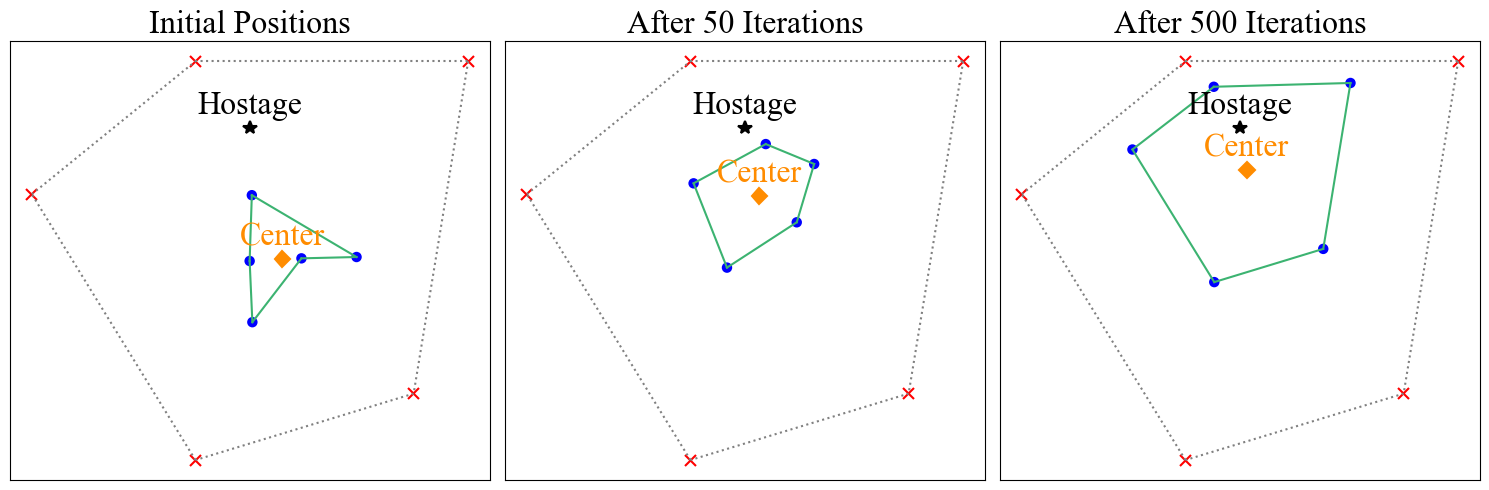

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np

# 假设 ans_x 和 ans_y 是列表，将其转换为 NumPy 数组
ans_x = np.array(ans_x)
ans_y = np.array(ans_y)

# 设置画布尺寸
plt.figure(figsize=(15, 5))

# 定义颜色
intruder_color = 'red'
robot_point_color = 'blue'  # 机器人点的颜色
robot_line_color = 'mediumseagreen'  # 机器人线的颜色
hostage_color = 'black'
center_color = 'darkorange'
line_color = 'gray'

# 定义标记大小和样式
intruder_marker = 'x'
robot_marker = 'o'
hostage_marker = '*'
center_marker = 'D'

# 定义标记大小
intruder_size = 8
robot_size = 6
hostage_size = 10
center_size = 8

# 函数：画机器人和连线
def plot_robots_and_lines(x, y, point_color, line_color, marker, size, linestyle='-', linewidth=1.5):
    # 计算中心点
    center_x, center_y = np.mean(x), np.mean(y)
    
    # 计算极角并排序
    angles = np.arctan2(y - center_y, x - center_x)
    sorted_indices = np.argsort(angles)
    
    sorted_x = x[sorted_indices]
    sorted_y = y[sorted_indices]
    
    # 绘制机器人点
    for i in range(n):
        plt.plot(sorted_x[i], sorted_y[i], marker=marker, color=point_color, markersize=size, markeredgewidth=1.5,
                 path_effects=[pe.withStroke(linewidth=3, foreground="white")])
    
    # 绘制机器人之间的连线，按照极角顺序
    for i in range(n):
        next_i = (i + 1) % n
        plt.plot([sorted_x[i], sorted_x[next_i]], [sorted_y[i], sorted_y[next_i]], color=line_color, linestyle=linestyle, linewidth=linewidth)

# 绘制第一个子图
plt.subplot(131)
plt.xticks([])
plt.yticks([])
plt.title('Initial Positions', fontsize=23, fontname='Times New Roman')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # 加上网格

# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker=intruder_marker, color=intruder_color, markersize=intruder_size, 
             markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 画围绕区域的边界
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color=line_color, linestyle='dotted', linewidth=1.5)

# 画机器人及其连线
plot_robots_and_lines(ans_x[:, 0], ans_y[:, 0], robot_point_color, robot_line_color, robot_marker, robot_size)

# 画人质
plt.plot(5, 7, marker=hostage_marker, color=hostage_color, markersize=hostage_size, 
         markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 画中心点
sum_x = np.sum(ans_x[:, 0])
sum_y = np.sum(ans_y[:, 0])
plt.plot(sum_x / n, sum_y / n, marker=center_marker, color=center_color, markersize=center_size, 
         markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 添加注释
plt.text(5, 7.2, 'Hostage', fontsize=23, color=hostage_color, ha='center', fontname='Times New Roman')
plt.text(sum_x / n, sum_y / n + 0.2, 'Center', fontsize=23, color=center_color, ha='center', fontname='Times New Roman')

# 绘制第二个子图
plt.subplot(132)
plt.xticks([])
plt.yticks([])
plt.title('After 50 Iterations', fontsize=23, fontname='Times New Roman')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # 加上网格

# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker=intruder_marker, color=intruder_color, markersize=intruder_size, 
             markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 画围绕区域的边界
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color=line_color, linestyle='dotted', linewidth=1.5)

# 画机器人及其连线
plot_robots_and_lines(ans_x[:, 50], ans_y[:, 50], robot_point_color, robot_line_color, robot_marker, robot_size)

# 画人质
plt.plot(5, 7, marker=hostage_marker, color=hostage_color, markersize=hostage_size, 
         markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 画中心点
sum_x = np.sum(ans_x[:, 50])
sum_y = np.sum(ans_y[:, 50])
plt.plot(sum_x / n, sum_y / n, marker=center_marker, color=center_color, markersize=center_size, 
         markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 添加注释
plt.text(5, 7.2, 'Hostage', fontsize=23, color=hostage_color, ha='center', fontname='Times New Roman')
plt.text(sum_x / n, sum_y / n + 0.2, 'Center', fontsize=23, color=center_color, ha='center', fontname='Times New Roman')

# 绘制第三个子图
plt.subplot(133)
plt.xticks([])
plt.yticks([])
plt.title('After 500 Iterations', fontsize=23, fontname='Times New Roman')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # 加上网格

# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker=intruder_marker, color=intruder_color, markersize=intruder_size, 
             markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 画围绕区域的边界
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color=line_color, linestyle='dotted', linewidth=1.5)
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color=line_color, linestyle='dotted', linewidth=1.5)

# 画机器人及其连线
plot_robots_and_lines(ans_x[:, 500], ans_y[:, 500], robot_point_color, robot_line_color, robot_marker, robot_size)

# 画人质
plt.plot(5, 7, marker=hostage_marker, color=hostage_color, markersize=hostage_size, 
         markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 画中心点
sum_x = np.sum(ans_x[:, 500])
sum_y = np.sum(ans_y[:, 500])
plt.plot(sum_x / n, sum_y / n, marker=center_marker, color=center_color, markersize=center_size, 
         markeredgewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground="white")])

# 添加注释
plt.text(5, 7.2, 'Hostage', fontsize=23, color=hostage_color, ha='center', fontname='Times New Roman')
plt.text(sum_x / n, sum_y / n + 0.2, 'Center', fontsize=23, color=center_color, ha='center', fontname='Times New Roman')

# 保存和显示图像
plt.tight_layout()  # 调整子图间的间距
plt.savefig('fig3.pdf', bbox_inches='tight')
plt.show()


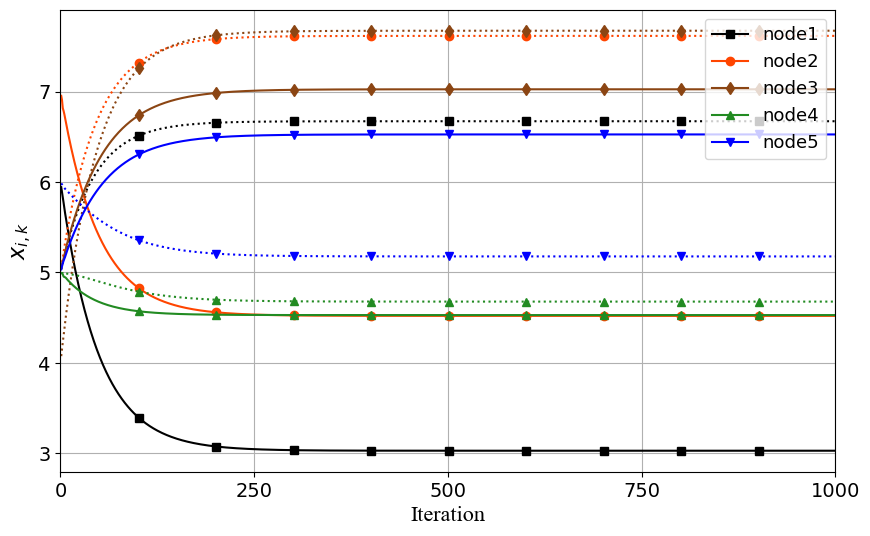

In [7]:
# 设置画布尺寸
plt.rcParams['figure.figsize'] = (10, 6)

# 设置x/y坐标的走势图标题
plt.ylabel('$x_i^k$', fontsize=16, fontname='Times New Roman')

# 定义标记符号和颜色
markers = ['s', 'o', 'd', '^', 'v', '<', '>']
colors = ['black', 'orangered', 'saddlebrown', 'forestgreen', 'blue', 'brown', 'olive']

# 截取合适长度的标记符号和颜色列表
markers = markers[0:n]
colors = colors[0:n]

# 设置索引
index = 0

# 绘制每条曲线，跳过第一个标记点
for i in range(n):
    # 生成标记点位置列表，跳过第一个位置
    interval = int(Iter_Num / 10)
    markevery = list(range(interval, Iter_Num, interval))
    
    plt.plot(range(1, Iter_Num + 1), ans_x[i], linestyle='-', linewidth=1.5, markersize=6, 
             markevery=markevery, marker=markers[index], color=colors[index], label=f'node{i+1}')
    plt.plot(range(1, Iter_Num + 1), ans_y[i], linestyle=':', linewidth=1.5, markersize=6, 
             markevery=markevery, marker=markers[index], color=colors[index])
    index += 1

# 添加图例并设置位置
plt.legend(loc="upper right", fontsize=13)

# 启用网格
plt.grid(True)

# 设置x轴和y轴标签及字体
plt.xlabel('Iteration', fontsize=16, fontname='Times New Roman')
plt.ylabel(r'$x_{i,k}$', fontsize=16, fontname='Times New Roman')

# 设置x轴刻度范围和间隔
x_ticks = np.linspace(0, Iter_Num, 5)
plt.xticks(x_ticks, fontsize=14)

# 设置y轴刻度字体大小
plt.yticks(fontsize=14)

# 设置x轴显示范围
plt.xlim(0, Iter_Num)

# 保存图像为PDF文件
plt.savefig('fig1.pdf', bbox_inches='tight')

# 显示绘制的图像
plt.show()

4.871040126423157
6.199741903029702
x/y坐标sigma的走势图
4.871040126402739 6.199741902749588


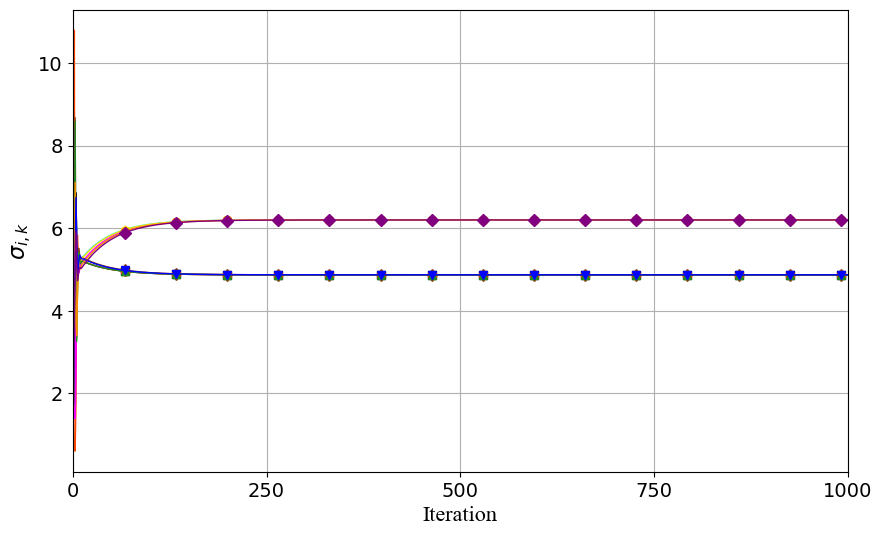

In [8]:
# 打印最后一个迭代点的 x 和 y 坐标值
print(s_x[0][Iter_Num-1])
print(s_y[0][Iter_Num-1])
print('x/y坐标sigma的走势图')
print(s_x[1][Iter_Num - 1], s_y[1][Iter_Num - 1])

# 设置画布尺寸
plt.rcParams['figure.figsize'] = (10, 6)

# 设置 y 轴标签
plt.ylabel(r'$\sigma_i^k$', fontsize=16, fontname='Times New Roman')

# 定义标记符号和颜色，分开为 x 和 y 使用不同颜色
markers_x = ['s', 'o', 'd', '^', 'v', '<', '>']
markers_y = ['*', 'p', 'h', 'X', 'D', 'P', 'H']  # 与 x 轴不同的标记符号
colors_x = ['black', 'orangered', 'saddlebrown', 'forestgreen', 'blue', 'brown', 'olive']
colors_y = ['cyan', 'magenta', 'gold', 'darkorange', 'purple', 'pink', 'teal']  # 与 x 轴不同的颜色

# 设置索引
index = 0

# 绘制每条曲线，调整线条宽度为 1.0，并且第一个位置不显示标记符号
for i in range(n):
    # 生成标记点位置列表，跳过第一个位置
    interval = int(Iter_Num / 15)
    markevery = list(range(interval, Iter_Num, interval))
    
    plt.plot(range(1, Iter_Num + 1), s_x[i], linestyle='-', linewidth=1.0, markersize=6, 
             markevery=markevery, marker=markers_x[index], color=colors_x[index])
    plt.plot(range(1, Iter_Num + 1), s_y[i], linestyle='-', linewidth=1.0, markersize=6, 
             markevery=markevery, marker=markers_y[index], color=colors_y[index])
    index += 1

# 启用网格
plt.grid(True)

# 设置x轴和y轴标签及字体
plt.xlabel('Iteration', fontsize=16, fontname='Times New Roman')
plt.ylabel(r'$\sigma_{i,k}$', fontsize=16, fontname='Times New Roman')

# 设置x轴刻度范围和间隔
x_ticks = np.linspace(0, Iter_Num, 5)
plt.xticks(x_ticks, fontsize=14)

# 设置y轴刻度范围和字体大小，使曲线的前期变化更为明显
plt.ylim(min(min(s_x[i]) for i in range(n)) - 0.5, max(max(s_x[i]) for i in range(n)) + 0.5)
plt.yticks(fontsize=14)

# 设置x轴显示范围
plt.xlim(0, Iter_Num)

# 保存图像为PDF文件
plt.savefig('fig2.pdf', bbox_inches='tight')

# 显示绘制的图像
plt.show()

[4. 5. 7. 7. 5.]
[7. 6. 5. 4. 6.]

[5. 7. 7. 7. 6.]
[4. 7. 7. 3. 4.]